# Sorting Algorithms

## Preparations

In [1]:
# Import libraries:
from random import choice, choices, seed
from time import time

%matplotlib inline

In [2]:
# Generate test arrays:
seed(1)
test_arrays = [choices(range(10**13), k=k) for k in [2**i for i in range(1,21)]]

In [186]:
test_arrays = [list(range(10**k))[::-1] for k in range(1,7)]

In [16]:
# Set global variable to count number of iterations:
n_iterrations = 0

# Create function that runs selected algorithm with arrays of different sizes:
def generate_perfomance_metrics(alg, test_arrays, debug=False):
    
    # Setup the lists to store results:
    k_num = []
    i_num = []
    d_rec = []
    sorted_arrays = []
    
    # Reset the iteration counter:
    global n_iterrations
    n_iterrations = 0
    
    # Check the algorithm performance with different array lenth:
    for arr in test_arrays:

        # Save the start time:
        start = time()

        # Apply the algorithm:
        sorted_array = alg(arr)

        # Calculate the run time:
        dur = time() - start    
        
        # Save results into lists:
        k_num.append(len(arr))
        i_num.append(n_iterrations)
        d_rec.append(dur)
        sorted_arrays.append(sorted_array)

        # Print debug messages if neccessary:
        if debug:
            print('finished for k = {}'.format(len(arr)), end=',\t')
            print('elapsed time: {:.4f}'.format(dur))
        
    # return the results:
    return k_num, i_num, d_rec, sorted_arrays

---

# Bubble sort (מיון בועות)
https://en.wikipedia.org/wiki/Bubble_sort

In [52]:
def bubble_sort(arr, l=0):
    
    '''
    Repeatedly steps through the list, compares adjacent elements and swaps them if they are in the wrong order.
    The pass through the list is repeated until the list is sorted.
    
    Keyword arguments:
        arr: array to be sorted
          l: number of elements that already have been sorted
    '''
    
    # Check if there are elements left to be checked:
    if l < len(arr):
        
        # Iterate through the list:
        for i in range(len(arr)-1 - l):
            
            # Compares adjacent elements and swaps them if they are in the wrong order:
            if arr[i] > arr[i+1]:
                
                # Swap the elements:
                arr[i], arr[i+1] = arr[i+1], arr[i]
                
        arr = bubble_sort(arr, l+1)
    
    return arr

---

# Insertion sort (מיון הכנסה)
https://en.wikipedia.org/wiki/Insertion_sort

In [206]:
def insert_sort(arr):
    
    '''
    Insertion sort is a simple sorting algorithm that builds the final sorted array (or list) one item at a time.
    
    Keyword arguments:
        arr: array to be sorted

    '''
    
    # Forward iteration:
    for i in range(1,len(arr)):
        
        # Check if the i-th element is smaller then the previous one:
        if arr[i] < arr[i-1]:
            
            # Set pointer j on the previous element:
            j = i - 1
            
            # Set the marker that the proper place is found to False:
            found = False
            
            # Iterate over elements in reverse order until the proper place for i-th element is found:
            while (j > 0) and (not found):
                
                # Move the j pointer one element back:
                j -= 1
                
                # Check if j got to the begining of the list or if element j is smaller then element i:
                if j < 0 or arr[j] < arr[i]:
                    
                    # Shift the i-th element to position j:
                    arr[j], arr[j+1:i] = arr[i], arr[j: i-1]
    
    # Return results: 
    return arr

---

## Quicksort (מיון מהיר)
https://ru.wikipedia.org/wiki/Быстрая_сортировка

In [207]:
def quick_sort(arr):
    
    # Check the lenth of the array:
    if len(set(arr)) < 2:
        return arr, counter
    
    # Set random split point:
    p = arr[choice(range(len(arr)))]
    
    # Split the array and apply recursion:
    left  = quick_sort([i for i in arr if i <  p])
    right = quick_sort([i for i in arr if i >= p])

    # Return the result:
    return left + right

---

## Merge sort (מיון מיזוג)
https://en.wikipedia.org/wiki/Merge_sort

In [62]:
def merge_sort(arr):
    
    # Check the array size:
    if len(set(arr)) < 2:
        return arr
    
    # Split the array into two halfs and apply recursive function:
    ind = int(len(arr)/2)
    left  = merge_sort(arr[:ind])
    right = merge_sort(arr[ind:])
    
    # Initialize subarray indexes:
    l, r = 0, 0
    
    # Initialize list to store united array:
    result = []
    
    # Add elements from subarrays in acsending order:
    while l < len(left) and r < len(right):
        
        # If the l-th element in the left subarray
        # is less than r-th element in the right subarray:
        if left[l] < right[r]:
            
            # Append the first element of the left subarray
            #to the result list and update index l:
            result.append(left[l])
            l += 1
        
        # Otherwise do the same operations with the right subarray:
        else:
            result.append(right[r])
            r += 1
    
    # If there are elements left in any of subarrays, add it to the result list:
    if l < len(left):
        result += left[l:]
    if r < len(right):
        result += right[r:]
    
    # Return the sorted array:
    return result

In [63]:
merge_sort(test_arrays[1])[1]

356

---

## Heapsort (מיון ערימה)
https://en.wikipedia.org/wiki/Heapsort  
https://habr.com/ru/post/112222/

#### Create Heapify procedure:

In [214]:
def heapify(heap, i):
    '''
    Rearranges  nodes in the heap starting from the node
    with the index i and then moves down the heap.\n
    
       heap: heap to be sorted
          i: zero-based index of node to start from
    '''
    
    # Get the heap size:
    heap_size = len(heap)
    
    # Find children indexes:
    ind_l = 2*i + 1 if 2*i + 1 < heap_size else False
    ind_r = 2*i + 2 if 2*i + 2 < heap_size else False
    
    # Extract node values (if there is no left or/and right child set its value to -inf):
    main  = heap[i]
    left  = heap[ind_l] if ind_l else -float('inf')
    right = heap[ind_r] if ind_r else -float('inf')

    # Check if the left child has the highest value:
    if left >=  right and left  > main:
        
        # Swap values:
        heap[i], heap[ind_l] = left, main
        
        # Run recursive function on updated child node:
        heap = heapify(heap, ind_l)
    
    # If left child is not the greatest one, check the right one:
    elif right > left and right > main:
        
        # Swap values:
        heap[i], heap[ind_r] = right, main
        
        # Run recursive function on updated child node:
        heap = heapify(heap, ind_r)
    
    # Return reordered heap:
    return heap

#### Create Buildheap procedure:

In [215]:
def build_heap(heap):
    '''

    '''
    
    # Get the number of elements in the heap:
    heap_size = len(heap)
    
    # Number of heap levels = log2 of number of nodes (rounded up):
    tree_size = ceil(log2(heap_size))
    
    # Number of parent levels = tree size - 1 (last level has no children).
    # But in case there is only 2 elements in the tree parent levels = 1
    parent_levels = 1 if heap_size == 2 else tree_size - 1
    
    # Number of parent nodes = geometric series with b = 1 (first node),
    # q = 2 (binary tree) and n = parent_levels.
    # For our purpose we need to get the list of these nodes in descending order:
    parent_nodes = list(range(2**parent_levels - 1))[::-1]
    
    # Apply heapify starting from the bottom of the tree:
    for node in parent_nodes:
        heap = heapify(heap, node)
            
    return heap

In [216]:
build_heap([8,3,1,5,2,7,2,9,4])

[9, 8, 7, 5, 2, 1, 2, 3, 4]

#### Create Heapsort procedure:

In [217]:
def heap_sort(heap):
    '''
    Builds binary tree out of the passed array, then a sorted array is created
    by repeatedly removing the largest element from the root of the heap.
    The heap is updated after each removal to maintain the heap property.
    Once all objects have been removed from the heap, the result is a sorted array.
    '''

    # Create list to store result:
    result = []

    # Iterate untill one element remains in the heap:
    while len(heap) > 1:
        
        # Get the sorted heap:
        heap = build_heap(heap)
        
        # Extract the largers element (heap root):
        result.append(heap[0])
        
        # Update the heap by replacing its root with the last element:
        heap[0] = heap[-1]
        
        # Remove the last element:
        heap = heap[:-1]
    
    # Append the last element of the heap to the result array:
    result += heap
    
    # Return the result:
    return result

In [ ]:
heap_sort(list(range(100)))

---

## Compare performance of different algorithms

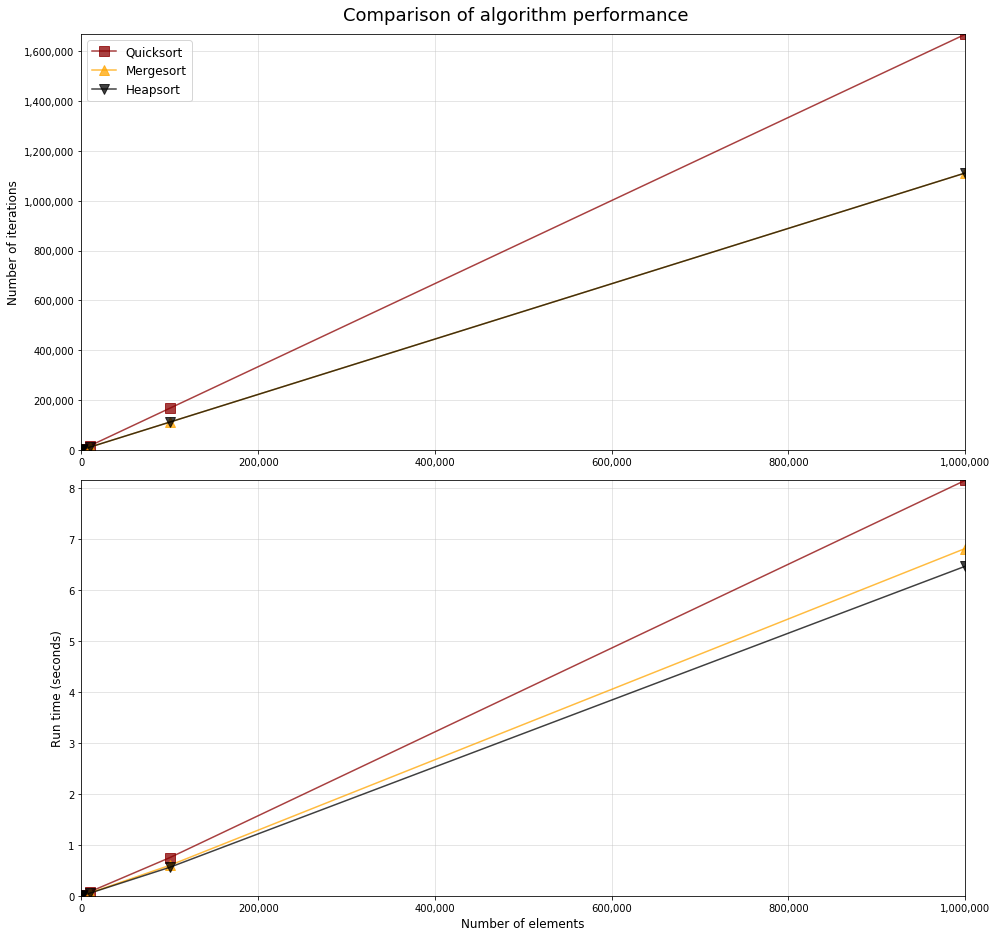

In [35]:
# Create graph object:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(13,13))

# Set figure properties:
fig.suptitle('Comparison of algorithm performance', fontsize=18)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

''' ------------------------------------------ Performance metrics ------------------------------------------'''

# Add lines:
ax[0].plot(quick_k_num, quick_i_num, color='darkred', marker='s', ms=10, alpha=0.75, label='Quicksort')
ax[0].plot(merge_k_num, merge_i_num, color='orange',  marker='^', ms=10, alpha=0.75, label='Mergesort')
ax[0].plot(heap_k_num,  heap_i_num,  color='black',   marker='v', ms=10, alpha=0.75, label='Heapsort')

# Set axis properties:
ax[0].grid(color='silver', alpha=0.4, linestyle='-', linewidth=1)
ax[0].set_xlim(0,max(quick_k_num))
ax[0].set_ylim(0,max(max(quick_i_num),max(merge_i_num),max(heap_i_num)))
ax[0].set_ylabel('Number of iterations', fontsize=12)
ax[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[0].legend(fontsize=12)

''' -------------------------------------------- Run time metrics -------------------------------------------'''
# Add lines:
ax[1].plot(quick_k_num, quick_d_rec, color='darkred', marker='s', ms=10, alpha=0.75, label='Quicksort')
ax[1].plot(merge_k_num, merge_d_rec, color='orange',  marker='^', ms=10, alpha=0.75, label='Mergesort')
ax[1].plot(heap_k_num,  heap_d_rec,  color='black',   marker='v', ms=10, alpha=0.75, label='Heapsort')

# Set axis properties:
ax[1].grid(color='silver', alpha=0.4, linestyle='-', linewidth=1)
ax[1].set_xlim(0,max(quick_k_num))
ax[1].set_ylim(0,max(max(quick_d_rec),max(merge_d_rec),max(heap_d_rec)))
ax[1].set_ylabel('Run time (seconds)', fontsize=12)
ax[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax[1].set_xlabel('Number of elements', fontsize=12)


plt.show()